# Purpose: To implement the code for Stable Count Thresholding Algorithm

In [181]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np

from skimage import io
from skimage import filters

*Defining the File Location*

In [453]:
file_location = '../../qdbev_lectin.tif'

*Reading in the image as a numpy array*

In [454]:
im = io.imread(file_location)

In [455]:
im.shape

(30, 512, 512)

*Splitting the color channels of the image*

In [456]:
cell_ims = im[0::2]
qd_ims = im[1::2]

## Testing for the cell_ims

*Creating a numpy array for Threshold values & Defining Delta*

In [457]:
#Defining delta according to the number provided by the paper
i = 0
delta = 1
T_array = np.arange(2*delta, 255, delta)
WT_array = np.zeros(256)

#initializing variables to decrease the processing for the rest of the for loop
im_binary_low = (cell_ims >= 0).astype(np.int_)
im_binary = (cell_ims >= delta).astype(np.int_)
im_binary_high = (cell_ims >= (2*delta)).astype(np.int_)




In [458]:
#Calculating the first WT:
NT_minus_delta = np.count_nonzero(im_binary_low)
NT = np.count_nonzero(im_binary)
NT_plus_delta = np.count_nonzero(im_binary_high)
    
WT = ((NT_minus_delta - 2 * NT + NT_plus_delta)/(delta**2))
    
WT_array[i] = WT

*Current code for quickly binarizing the 3D image and getting the count of non-zero values*

In [459]:
im_binary_low = im_binary
im_binary = im_binary_high
i = 1

In [460]:
for T in T_array:
    #getting a binary image 
    im_binary_high = (cell_ims >= (T + delta)).astype(np.int_)
    
    NT_minus_delta = np.count_nonzero(im_binary_low)
    NT = np.count_nonzero(im_binary)
    NT_plus_delta = np.count_nonzero(im_binary_high)
    
    WT_plus = ((NT_minus_delta - 2 * NT + NT_plus_delta)/(delta**2))
    
    WT_array[i] = WT_plus
    
    #increased the alpha because I think that we have bigger pictures than those used in the paper
    alpha = NT/20000
    
    if WT_plus < alpha:
        if abs(WT - WT_plus) in range(0,10):
            print(T - delta, abs(WT-WT_plus))
              
        else:
             pass
    else:
        pass
    
    #Resetting variable names for next loop
    im_binary_low = im_binary
    im_binary = im_binary_high
    WT = WT_plus
    i += 1    


1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 1.0
58 2.0
59 1.0
60 0.0
61 6.0
62 2.0
185 3.0
204 4.0
205 9.0
206 7.0
207 2.0
222 0.0


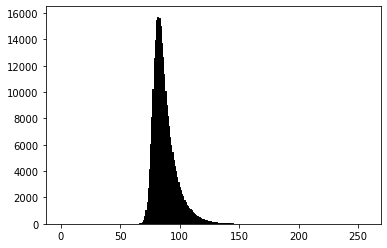

In [461]:
cell_hist = plt.hist(cell_ims[0].ravel(), bins=256, range = (0, 256), fc='k', ec='k')

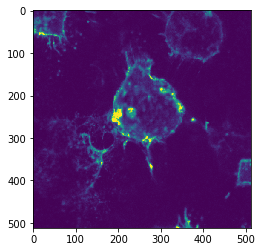

In [462]:
plt.imshow(cell_ims[3])

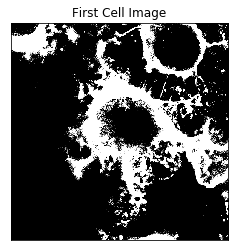

In [463]:
plt.imshow(cell_ims[5], cmap = 'gray', clim=(185,256))
plt.title('First Cell Image')
plt.xticks([])
plt.yticks([])

plt.show()

In [464]:
IM_MAX= np.max(cell_ims, axis=0)

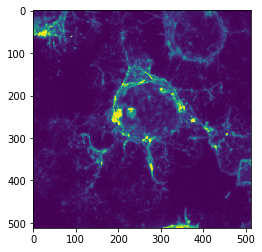

In [465]:
plt.imshow(IM_MAX)

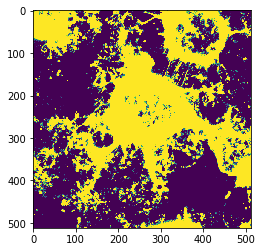

In [466]:
plt.imshow(IM_MAX, clim=(185,256))

## Testing for the qd ims

In [467]:
#Defining delta according to the number provided by the paper
i = 0
delta = 1
T_array = np.arange(2*delta, 255, delta)
WT_array = np.zeros(256)

#initializing variables to decrease the processing for the rest of the for loop
im_binary_low = (qd_ims >= 0).astype(np.int_)
im_binary = (qd_ims >= delta).astype(np.int_)
im_binary_high = (qd_ims >= (2*delta)).astype(np.int_)




In [468]:
#Calculating the first WT:
NT_minus_delta = np.count_nonzero(im_binary_low)
NT = np.count_nonzero(im_binary)
NT_plus_delta = np.count_nonzero(im_binary_high)
    
WT = ((NT_minus_delta - 2 * NT + NT_plus_delta)/(delta**2))
    
WT_array[i] = WT

*Current code for quickly binarizing the 3D image and getting the count of non-zero values*

In [469]:
im_binary_low = im_binary
im_binary = im_binary_high
i = 1

In [470]:
for T in T_array:
    #getting a binary image 
    im_binary_high = (qd_ims >= (T + delta)).astype(np.int_)
    
    NT_minus_delta = np.count_nonzero(im_binary_low)
    NT = np.count_nonzero(im_binary)
    NT_plus_delta = np.count_nonzero(im_binary_high)
    
    WT_plus = ((NT_minus_delta - 2 * NT + NT_plus_delta)/(delta**2))
    
    WT_array[i] = WT_plus
    
    #increased the alpha because I think that we have bigger pictures than those used in the paper
    alpha = NT/20000
    
    if WT_plus < alpha:
        if abs(WT - WT_plus) in range(0,10):
            print(T - delta, abs(WT-WT_plus))
              
        else:
             pass
    else:
        pass
    
    #Resetting variable names for next loop
    im_binary_low = im_binary
    im_binary = im_binary_high
    WT = WT_plus
    i += 1    


106 5.0
109 4.0
122 5.0
131 7.0
138 7.0
141 4.0
143 9.0
154 6.0
156 8.0
161 8.0
166 3.0
169 5.0
170 1.0
172 4.0
173 3.0
177 8.0
178 5.0
186 8.0
191 2.0
192 6.0
197 2.0
198 0.0
202 7.0
203 6.0
205 7.0
206 0.0
207 1.0
208 6.0
210 8.0
211 7.0
213 7.0
215 8.0
216 5.0
220 5.0
221 0.0
222 2.0
224 1.0
225 3.0
231 6.0
237 6.0
242 1.0
245 6.0
246 2.0
248 8.0
249 2.0
250 4.0


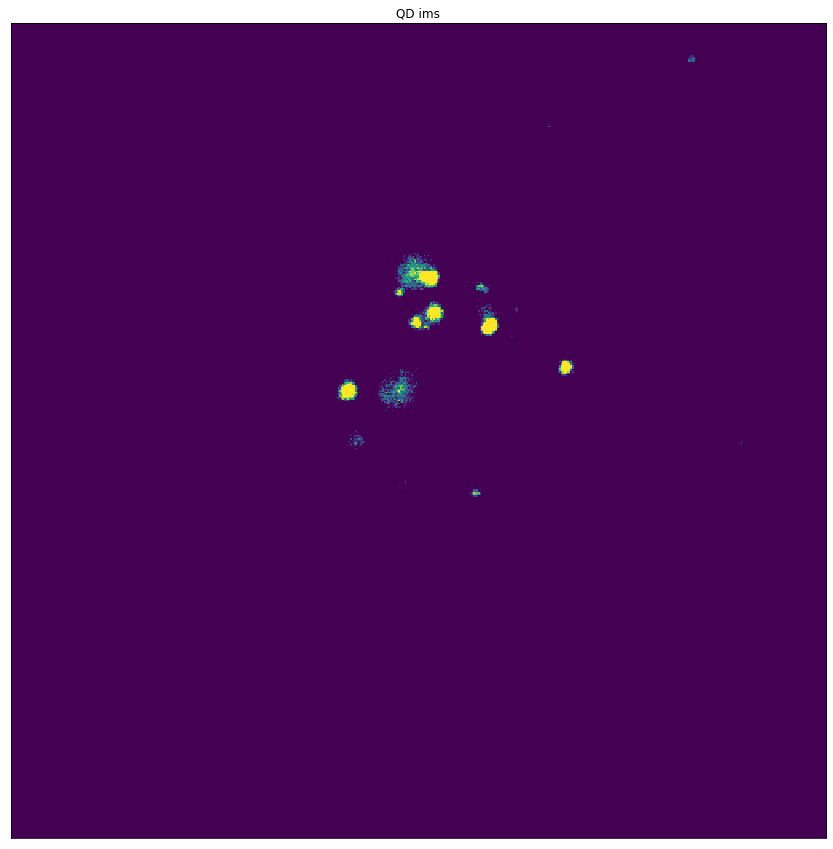

In [475]:
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.imshow(qd_ims[5], clim=(106, 256))
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('QD ims')

fig.set_size_inches(15, 15, forward=True)

In [472]:
IM_MAX_QD = np.max(qd_ims, axis=0)

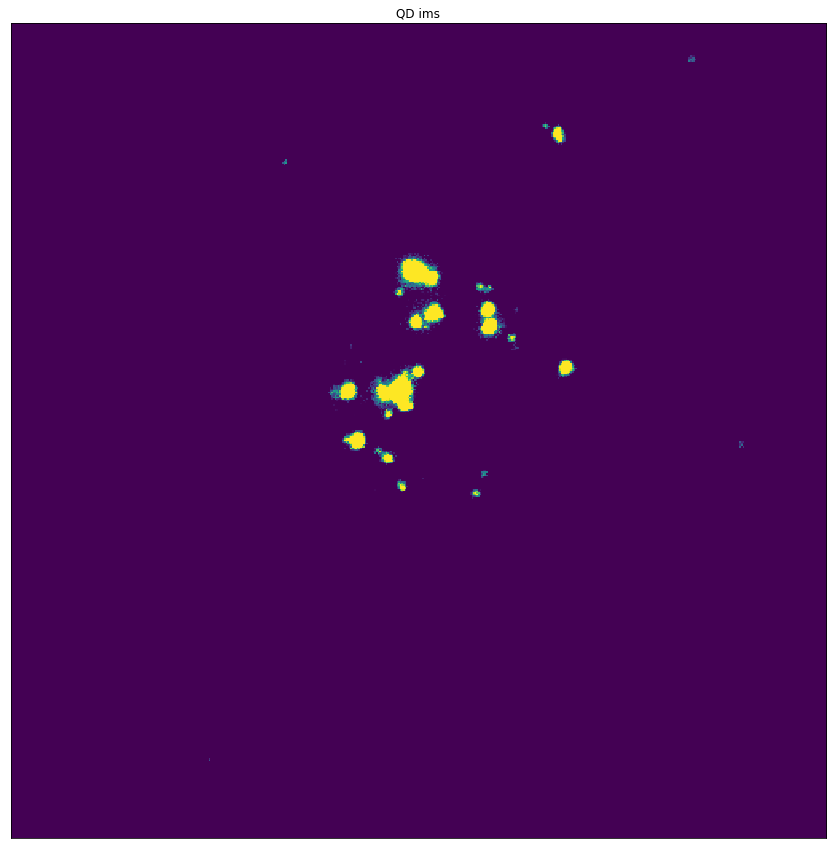

In [473]:
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.imshow(IM_MAX_QD, clim=(106, 256))
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('QD ims')

fig.set_size_inches(15, 15, forward=True)

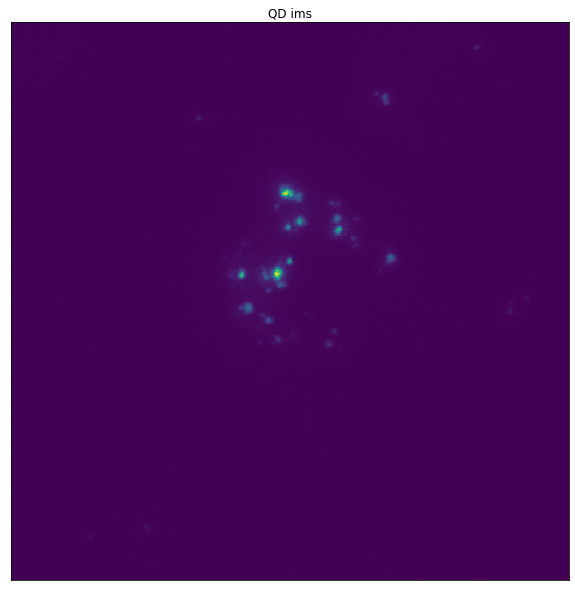

In [474]:
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.imshow(IM_MAX_QD)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('QD ims')

fig.set_size_inches(10, 12, forward=True)